### Zadatak 1
Podacima iz tablice 1 prilagodite polinom trećeg reda, te funkciju ${f(x) = a \sin(x)}$ te nacrtajte sve na jednom grafu. Neka krivulje budu različitih boja, a u legendi naznačite koja krivulja prikazuje koju funkciju.
Izračunajte reducirani ${X^2}$ prema formuli
$${X^2_{red} = \frac{1}{NDF} \sum_{i} \frac{(y_{i} − f(x_{i}))^2}{\sigma^2_{y_{i}}}}$$

pri čemu $\texttt{NDF}$ označava broj stupnjeva slobode. $\texttt{NDF}$ je jednak broju točaka umanjenom za broj parametara funkcije kojom fitate mjerenja. Ovo izračunajte za oba slučaja i razmislite koji model je bolja “teorija” koja objašnjava dane eksperimentalne podatke.

1.4180176174927726 1.8915981417746626
Sinus funkcija je bolji model.


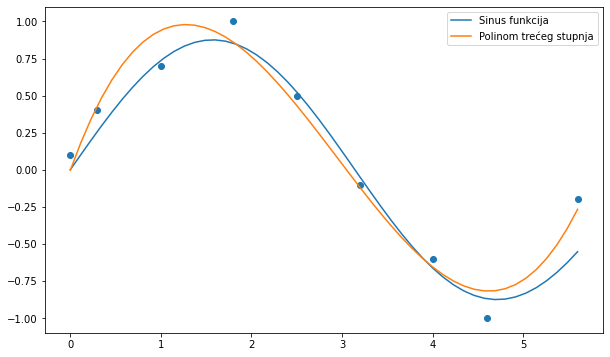

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

tablica = [(0.0, 0.1, 0.3), (0.3, 0.4, 0.2), (1.0, 0.7, 0.3), (1.8, 1.0, 0.1), (2.5, 0.5, 0.2),
                   (3.2, -0.1, 0.1), (4.0, -0.6, 0.3), (4.6, -1.0, 0.3), (5.6, -0.2, 0.2)]
tablica = np.array(tablica)

def f(x, a):
    return a * np.sin(x)

def polinom(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

pars1, cov1 = curve_fit(f, tablica[:, 0], tablica[:, 1])
pars2, cov2 = curve_fit(polinom, tablica[:, 0], tablica[:, 1])

ndf1 = len(tablica[:, 0])/2
ndf2 = len(tablica[:, 0])/5

reducirani1 = (1/ndf1) * np.sum((tablica[:, 1] - f(tablica[:, 0], *pars1))**2 / tablica[:, 2]**2)
reducirani2 = (1/ndf2) * np.sum((tablica[:, 1] - polinom(tablica[:, 0], *pars2))**2 / tablica[:, 2]**2)
print(reducirani1, reducirani2)
print('Sinus funkcija je bolji model.')
xs = np.linspace(min(tablica[:, 0]), max(tablica[:, 0]))
fig, ax = plt.subplots(figsize=[10, 6])
ax.scatter(tablica[:, 0], tablica[:, 1])
ax.plot(xs, f(xs, *pars1), label='Sinus funkcija')
ax.plot(xs, polinom(xs, *pars2), label='Polinom trećeg stupnja')
ax.legend()